In [19]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [19]:
data = pd.read_csv("fraudTrain.csv")
# Keep only the desired columns
#data = data[['cc_num', 'amt', 'first', 'last', 'street', 'is_fraud']]
data = data[['cc_num', 'amt', 'is_fraud']]
print(data.head())

             cc_num     amt  is_fraud
0  2703186189652095    4.97         0
1      630423337322  107.23         0
2    38859492057661  220.11         0
3  3534093764340240   45.00         0
4   375534208663984   41.96         0


In [20]:
print(data.shape)
print(data.describe())

(1296675, 3)
             cc_num           amt      is_fraud
count  1.296675e+06  1.296675e+06  1.296675e+06
mean   4.171920e+17  7.035104e+01  5.788652e-03
std    1.308806e+18  1.603160e+02  7.586269e-02
min    6.041621e+10  1.000000e+00  0.000000e+00
25%    1.800429e+14  9.650000e+00  0.000000e+00
50%    3.521417e+15  4.752000e+01  0.000000e+00
75%    4.642255e+15  8.314000e+01  0.000000e+00
max    4.992346e+18  2.894890e+04  1.000000e+00


In [21]:
# Determine number of fraud cases in dataset
fraud = data[data['is_fraud'] == 1]
valid = data[data['is_fraud'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Transactions: {}'.format(len(valid)))

0.005822355331224998
Fraud Cases: 7506
Valid Transactions: 1289169


In [22]:
fraud.amt.describe()

count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: amt, dtype: float64

In [23]:
valid.amt.describe()

count    1.289169e+06
mean     6.766711e+01
std      1.540080e+02
min      1.000000e+00
25%      9.610000e+00
50%      4.728000e+01
75%      8.254000e+01
max      2.894890e+04
Name: amt, dtype: float64

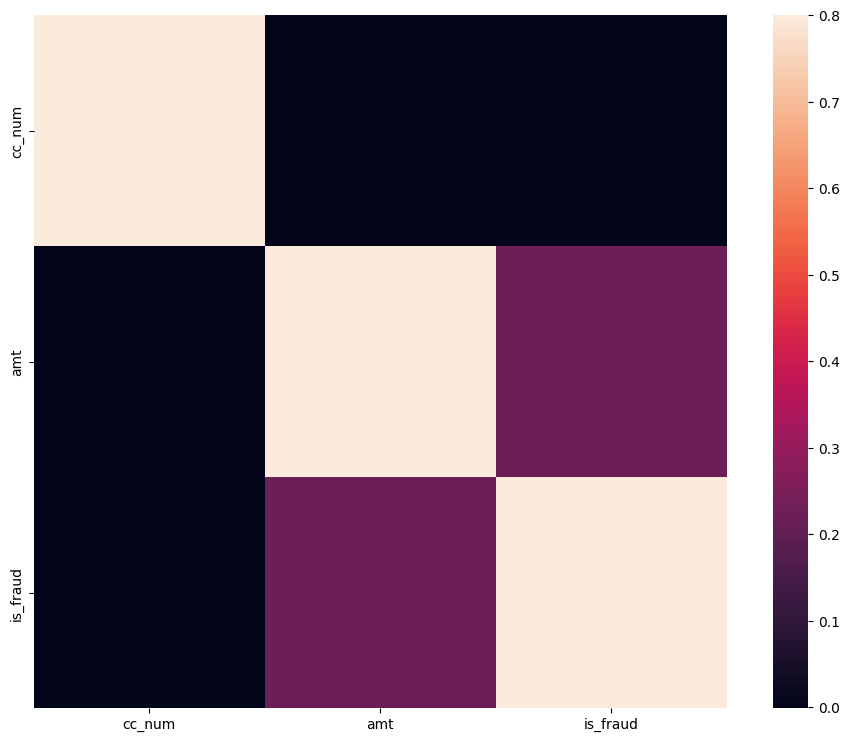

In [24]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [25]:
# dividing the X and the Y from the dataset
X = data.drop(['is_fraud'], axis = 1)
Y = data["is_fraud"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(1296675, 2)
(1296675,)


In [26]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [27]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [28]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9943162319008233
The precision is 0.5283251231527094
The recall is 0.2822368421052632
The F1-Score is 0.3679245283018868
The Matthews correlation coefficient is0.3835924253711992


In [29]:
import joblib
joblib.dump(rfc, 'fraud_model2.pkl')

['fraud_model2.pkl']